In [1]:
#UPLOAD THIS MODEL ZIP FILE BEFORE RUNNING THIS AND THEN RUN 
!unzip alexnetcustom10writers.zip -d alexnetcustom10writes

Archive:  alexnetcustom10writers.zip
   creating: alexnetcustom10writes/assets/
   creating: alexnetcustom10writes/variables/
  inflating: alexnetcustom10writes/saved_model.pb  
  inflating: alexnetcustom10writes/variables/variables.index  
  inflating: alexnetcustom10writes/variables/variables.data-00000-of-00001  


In [2]:
#RUN
import tensorflow as tf
from tensorflow import keras

In [3]:
#RUN
model=keras.models.load_model("/content/alexnetcustom10writes")

In [4]:
#RUN
!pip install mapper

     |████████████████████████████████| 3.0MB 5.7MB/s 
  Created wheel for mapper: filename=mapper-0.1.17-cp36-none-any.whl size=1918872 sha256=3d5ad984af44519a6872dacb6f4ade0305c5c53ded81f81881c72f993e4e6aae
  Stored in directory: /root/.cache/pip/wheels/43/54/8f/f14fca54d9ac27835ce2f71c09c22df114e01701ff805c38cb
Successfully built mapper


In [5]:
#RUN
import cv2
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#import mapper
from PIL import Image

def show_image(image_object,name):
  plt.figure(figsize=(14, 7))
  plt.title(name)
  if(name!='Grayscale_Image'):
    plt.imshow(image_object)
  else:
    plt.imshow(image_object, cmap='Greys_r')

edged_image=""
lst=[]
x=0
def preprocess1(image_path):
  image=cv2.imread(image_path)   #read in the image
  #image=cv2.resize(image,(1300,800)) #resizing because opencv does not work well with bigger images
  show_image(image,"Input_Image")

  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  #RGB To Gray Scale
  show_image(gray,"Grayscale_Image")    #output of yellow bg is not a bug. By default, matplotlib use a colormap which maps intensities to colors. To avoid this, use:

  blurred=cv2.GaussianBlur(gray,(5,5),0)  #(5,5) is the kernel size and 0 is sigma that determines the amount of blur
  show_image(blurred,"Blurred_Image")

  edged=cv2.Canny(blurred,30,50)  #30 MinThreshold and 50 is the MaxThreshold
  show_image(edged,"Edged_Image")
  #new_image_name=input("Enter name for the processed image to get saved..")
  global x
  x=random.randint(100)
  new_image_name='edgedimg'+str(x)+'.jpeg'
  while x in lst:
    x=random.randint(100)
    new_image_name='edgedimg'+str(x)+'.jpeg'
  lst.append(x)
  
  print(new_image_name)
  cv2.imwrite(new_image_name,edged)
  global edged_image
  edged_image=new_image_name

edgedimg29.jpeg


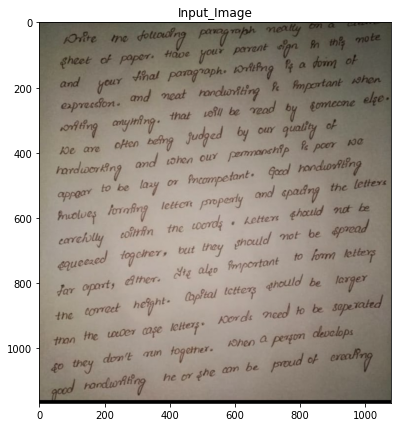

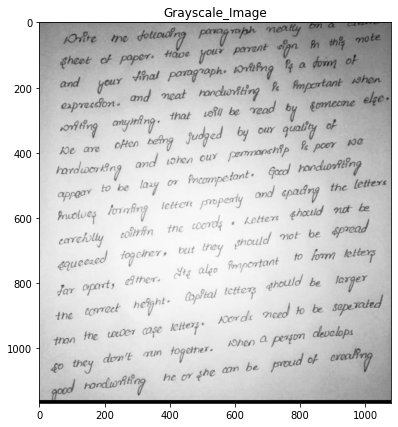

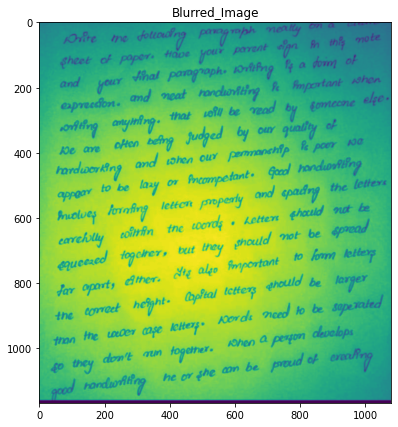

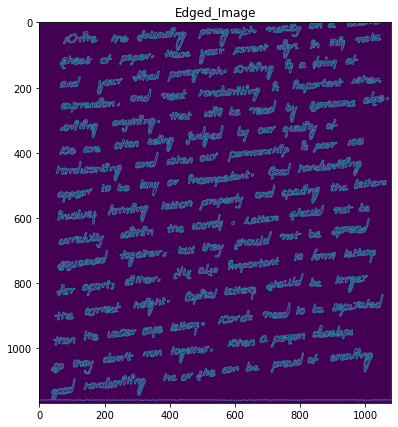

In [6]:
#JUST INPUT THE PATH OF THE ORIGINAL INPUT IMAGE AND RUN
preprocess1("/content/pru-orighw.jpeg")

In [7]:
#RUN
def get_random_crop(image, crop_height, crop_width):
    max_x = image.shape[1] - crop_width
    max_y = image.shape[0] - crop_height
    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)
    crop = image[y: y + crop_height, x: x + crop_width]
    return crop

def sliding_window(no_of_crops,imagepath,htsize=224,wdsize=224):
      #print(imagepath)
      iimg = cv2.imread(imagepath)
      for cnt in range(1,no_of_crops+1):
        iimg2=get_random_crop(iimg,htsize,wdsize)
        cv2.imwrite('/content/croppedimg'+str(x)+'.jpeg', iimg2)
        show_image(iimg2,"cropped_image")
        cnt=cnt+1

In [ ]:
#RUN (TO OUTPUT MORE SLICES CHANGE NUMBER IN 1ST PARAM)

sliding_window(1,'/content/'+edged_image)

In [9]:
#RUN
import numpy as np
from keras.preprocessing import image
classes=['ammaHW','ashishHW','aswadHW','DKmamHW','nagsHW','nandanaHW','pavanHW','pruthviHW','sravyaHW','yeshwanthHW']
def test_on_a_image(path="/content/datasetedgedv1/datasetedged/test_set/64/cropimg1000.jpeg"):
  test_image = image.load_img(path, target_size = (224, 224))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = model.predict(test_image)
  for i in result:
    count=0
    for j in i:
      z=float(format(j,'.5f'))
      print(classes[count]+"="+str(z*100)+'%',end="\n")
      count+=1



In [39]:
#RUN
test_on_a_image('/content/croppedimg'+str(x)+'.jpeg') #correctly classified

ammaHW=0.001%
ashishHW=0.0%
aswadHW=0.001%
DKmamHW=0.0%
nagsHW=0.0%
nandanaHW=0.0%
pavanHW=99.993%
pruthviHW=0.004%
sravyaHW=0.0%
yeshwanthHW=0.0%


In [ ]:
#TESTS FROM HERE ONWARDS...DONT CONSIDER

In [72]:
test_on_a_image('/content/pru_crops2/cropimg93.jpeg') #correctly classified

ammaHW=0.492%
ashishHW=0.074%
aswadHW=0.011000000000000001%
DKmamHW=0.005%
nagsHW=0.197%
nandanaHW=0.002%
pavanHW=99.12100000000001%
pruthviHW=0.08800000000000001%
sravyaHW=0.003%
yeshwanthHW=0.006999999999999999%


In [23]:
!pip install Augmentor

In [36]:
import Augmentor
import os
import shutil
output_directory="/content/origimgs/output"
def rename_files(dir_path,operation,execs):
  count=1
  for filename in os.listdir(dir_path):
    if(filename[:8]=='origimgs'):
      dest=operation+"-"+str(execs)+"-"+str(count)+".jpeg"
      os.rename(dir_path+"/"+filename,dir_path+"/"+dest) 
      count+=1
def init_augmentor(flag):
  if(flag):
    os.makedirs('/content/origimgs')
    shutil.move('/content/'+edged_image, '/content/origimgs/')
  p = Augmentor.Pipeline("/content/origimgs/")
  return p

def rotate(no_of_images=10,lr=10,rr=10,execs=1):
  p=init_augmentor(0)
  p.rotate(probability=0.9, max_left_rotation=lr, max_right_rotation=rr)
  p.sample(no_of_images)
  rename_files(output_directory,"rotate",execs)

def random_distortion(no_of_images=10,gridwdth=4,gridht=4,mag=15,execs=1):
  p=init_augmentor(0)
  p.random_distortion(probability=1, grid_width=gridwdth, grid_height=gridht, magnitude=mag)
  p.sample(no_of_images)
  rename_files(output_directory,"distortion",execs)

In [ ]:
init_augmentor(1)

In [68]:
rotate(50,14,12,1)
rotate(50,8,10,2)
random_distortion(50,10,10,12,1)
random_distortion(50,4,4,18,2)

Executing Pipeline:   0%|          | 0/50 [00:00<?, ? Samples/s]

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

Processing <PIL.Image.Image image mode=L size=1080x1168 at 0x7FEE92F58DD8>: 100%|██████████| 50/50 [00:04<00:00, 11.42 Samples/s]
Executing Pipeline:   0%|          | 0/50 [00:00<?, ? Samples/s]

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

Processing <PIL.Image.Image image mode=L size=1080x1168 at 0x7FEE94271F28>: 100%|██████████| 50/50 [00:04<00:00, 11.99 Samples/s]
Executing Pipeline:   0%|          | 0/50 [00:00<?, ? Samples/s]

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

Processing <PIL.Image.Image image mode=L size=1080x1168 at 0x7FEE95ED7FD0>: 100%|██████████| 50/50 [00:04<00:00, 12.10 Samples/s]
Executing Pipeline:   0%|          | 0/50 [00:00<?, ? Samples/s]

Initialised with 1 image(s) found.
Output directory set to /content/origimgs/output.

Processing <PIL.Image.Image image mode=L size=1080x1168 at 0x7FEE95EEB5C0>: 100%|██████████| 50/50 [00:04<00:00, 12.11 Samples/s]


In [69]:
def get_random_crop(image, crop_height, crop_width):
    max_x = image.shape[1] - crop_width
    max_y = image.shape[0] - crop_height
    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)
    crop = image[y: y + crop_height, x: x + crop_width]
    return crop

path3="/content/origimgs/output/" #path of folders having 200 images
def sliding_window(no_of_crops,foldername,htsize=224,wdsize=224):
  cnt=1
  for imagename in os.listdir(path3):
    if(imagename=='.ipynb_checkpoints'):
      continue
    example_img=path3+imagename
    iimg = cv2.imread(example_img)
    for i in range(no_of_crops):
      iimg2=get_random_crop(iimg,htsize,wdsize)
      cv2.imwrite('/content/'+foldername+'/cropimg'+str(cnt)+'.jpeg', iimg2)
      #cv2.imwrite('/content/croppedimgs68/cropimg'+str(cnt)+'.jpeg', iimg2)
      cnt=cnt+1

In [70]:
cropped_folder=input("Enter a name for the empty folder to save 224*224 slices")
os.makedirs("/content/"+cropped_folder)
sliding_window(5,cropped_folder) #check folder then go above upto zipper cell..zip this folder and download

Enter a name for the empty folder to save 224*224 slicespru_crops2


In [66]:
from google.colab import files
def make_zipfolder(zipfoldername,folder_path):
  shutil.make_archive(zipfoldername, 'zip', folder_path)
  files.download(zipfoldername+".zip")
def delete_folder(path):
  shutil.rmtree(path)

In [73]:
make_zipfolder("pru2_cropimgs","/content/pru_crops2")  #give anyname that u like

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
delete_folder('/content/origimgs/output')